<a href="https://colab.research.google.com/github/gsasikiran/Semantic-similarity/blob/master/analyzing_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading the word embeddings

In [0]:
!pip3 install bert-embedding
!pip3 install allennlp

In [0]:
!pip3 install --upgrade numpy

In [7]:
import scipy

import numpy as np
import nltk
nltk.download('punkt')

import tarfile

from nltk.tokenize import word_tokenize
from bert_embedding import BertEmbedding
from allennlp.commands.elmo import ElmoEmbedder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.6/dist-packages/sklearn/utils/linear_assignment_.py:21: DeprecationWarning: The linear_assignment_ module is deprecated in 0.21 and will be removed from 0.23. Use scipy.optimize.linear_sum_assignment instead.
  DeprecationWarning)


## Preprocessing:
* Tokenize sentences
* Assigning corresponding word embeddings
* Create cosine similarity matrix based on the distances between the word embeddings.

In [0]:
class PreProcess:
  
  def __init__(self, first_sentence, second_sentence):
    self.sentence_1 = first_sentence
    self.sentence_2 = second_sentence
    self.tokenized_sent_1 = word_tokenize(self.sentence_1)
    self.tokenized_sent_2 = word_tokenize(self.sentence_2)
    
  def get_elmo_embedding(self):
    '''Creates ELMo word embeddings for the given words
    returns: ndarray, ndarray
      Returns the ELMo embeddings of the tokens of two sentences'''
    elmo = ElmoEmbedder()
    elmo_embedding_1 = elmo.embed_sentence(self.tokenized_sent_1)
    elmo_embedding_2 = elmo.embed_sentence(self.tokenized_sent_2)
    return elmo_embedding_1, elmo_embedding_2

#   We are creating two functions for returning word arrays, as embeddings of all models are not of similar format
  def create_elmo_word_arrays(self, embedding):
    ''' Creates the list of arrays of each corresponding word
    parameters
    embedding : ndarray
    returns: list
      Returns the list of elmo embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding[0])):
      word_array.append(embedding[0][i])
    return word_array
    
  def get_bert_embedding(self):
    '''Creates word embeddings taken from ELMo language representation
    returns: list, list
      Returns the BERT embeddings of the tokens of two sentences'''
    bert_embedding_1  = BertEmbedding().embedding(sentences = self.tokenized_sent_1)
    bert_embedding_2  = BertEmbedding().embedding(sentences = self.tokenized_sent_2)
    return bert_embedding_1, bert_embedding_2
    

  def create_bert_word_arrays(self, embedding):
    ''' Creates the list of arrays of each corresponding word
    param
    embedding: list
    returns: list
      Returns the list of BERT embedding of each word 
    '''
    word_array = []
    for i in range(len(embedding)):
      word_array.append(embedding[i][1][0])
    return word_array

  def cosine_similarity_matrix(self, array_1, array_2):
    '''
    param:
    array_1: array
      Array of first sentence word embeddings
    array_2: array
      Array of second sentence word embeddings
    returns: array
      Similarity matrix of words in two sentences
    '''
    matrix = np.zeros((len(array_1), len(array_2)))

    for i in range(0, len(array_1)):
      for j in range(0, len(array_2)):
        matrix[i][j]= scipy.spatial.distance.cosine(array_1[i], array_2[j])
    return matrix.T       


 ## Processing:
 * Plotting the similarity matrix based on the cosine matrix from preprocessing class
 * Creating a list of similar words of one sentence for each word in the other sentence.

In [0]:
def plot_similarity_matrix(first_sentence, second_sentence):
  '''Plot the similarity matrix of two sentences
  parameters:
    first_sentence: str
      Input the first sentence as a string
    second_sentence: str
      Input the second sentence as a string
  returns: None
  '''
  x_labels, y_labels = word_tokenize(first_sentence), word_tokenize(second_sentence)
  similarity_matrix = main(first_sentence, second_sentence)
  sns.heatmap(similarity_matrix, vmin=0, vmax=1, xticklabels=x_labels, yticklabels=y_labels, cmap="YlGnBu")
  plt.show()

def get_similar_words(sentence_1, sentence_2):
  '''Prints similar word from second sentence for each word in the first sentence
  parameters:
    first_sentence: str
      Input the first sentence
    second_sentence: str
      Input the second sentence
  '''
  token_1 = word_tokenize(sentence_1)
  token_2 = word_tokenize(sentence_2)
  
  similarity_matrix = main(sentence_1, sentence_2)
  
  print('similarity matrix is :', similarity_matrix)
  similar_word_dict = {}
  for row in range(0,len(similarity_matrix[0])):
    
    min_val = min(similarity_matrix.T[row]) #Here min value of transpose is found. To understand it print similarity matrix and find the logic
    index = (np.where(similarity_matrix.T[row] == min_val))[0]
    similar_word_list = []
    
    for i in range(0,len(index)):
      similar_word_list.append(token_2[index[i]])
    similar_word_dict[token_1[row]] = similar_word_list
    
  print('Similar words are :', similar_word_dict)

In [0]:
def main(first_input, second_input):
  preprocess = PreProcess(first_input, second_input)
  print("Select the transfer learning model")
  num = int(input('1 : BERT model, 2 : ELMo model'))
  if num == 1:
    first_embedding, second_embedding = preprocess.get_bert_embedding()
    print("BERT embedding")
    word_array_1, word_array_2 = preprocess.create_bert_word_arrays(first_embedding), preprocess.create_bert_word_arrays(second_embedding)  
  elif num ==2:
    first_embedding, second_embedding = preprocess.get_elmo_embedding()
    print("ELMo embedding")
    word_array_1, word_array_2 = preprocess.create_elmo_word_arrays(first_embedding), preprocess.create_elmo_word_arrays(second_embedding)  

  return preprocess.cosine_similarity_matrix(word_array_1, word_array_2)
  
    

* Input the sentences and required functions

Select the transfer learning model
1 : BERT model, 2 : ELMo model1
Vocab file is not found. Downloading.
BERT embedding
similarity matrix is : [[0.55062258 0.50705758 0.55394492 0.52845278 0.62727168]
 [0.44644415 0.46746862 0.52638984 0.50875375 0.49690098]
 [0.49736363 0.23914939 0.29816723 0.42610037 0.49773574]
 [0.35717058 0.30203468 0.41909271 0.         0.43552619]
 [0.43835843 0.27199525 0.42164135 0.38960534 0.45804393]]
Similar words are : {'Flowers': ['spring'], 'blossom': ['on'], 'in': ['on'], 'spring': ['spring'], 'season': ['spring']}
Select the transfer learning model
1 : BERT model, 2 : ELMo model1
BERT embedding


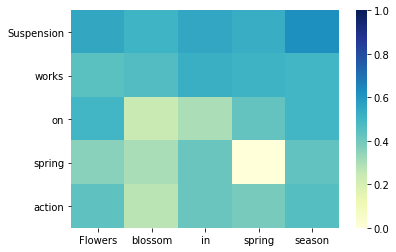

In [11]:
input_1 = "Flowers blossom in spring season"
input_2 = "Suspension works on spring action"
get_similar_words(input_1, input_2)
plot_similarity_matrix(input_1, input_2)

<b> Note:</b> 
* The lighter the map is the more similar the words are...
* Following is the question from "Mohler dataset."